In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_csv('E://desktop/data/fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# identifying data types

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# basic statistics

In [105]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# univariate non graphical analysis

In [106]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [107]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [108]:
for i in range(1,len(df.columns)):
    print(df.columns[i],'\n','mean',df[df.columns[i]].mean(),'median',df[df.columns[i]].median())

Weight 
 mean 398.3264150943396 median 273.0
Length1 
 mean 26.247169811320756 median 25.2
Length2 
 mean 28.415723270440253 median 27.3
Length3 
 mean 31.227044025157234 median 29.4
Height 
 mean 8.970993710691824 median 7.786
Width 
 mean 4.417485534591195 median 4.2485


# univariate graphical analysis

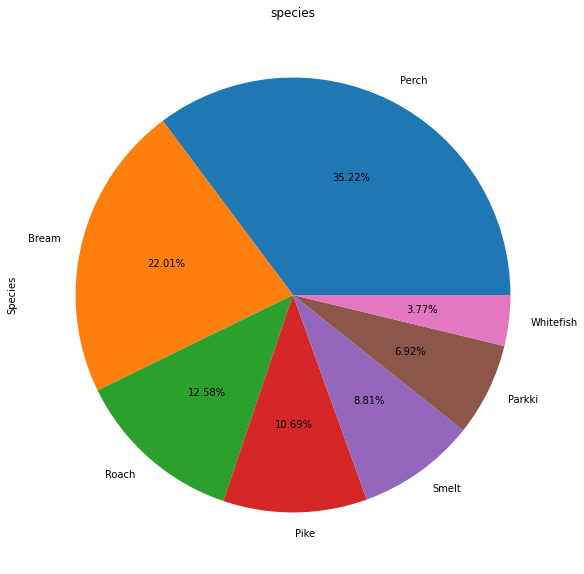

In [109]:
plt.figure(figsize=(10,10))
df['Species'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('species')
plt.show()

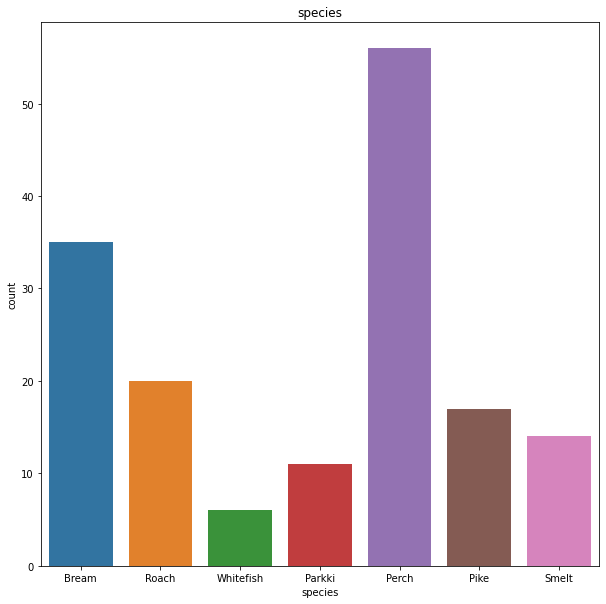

In [110]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Species'])
plt.title('species')
plt.xlabel('species')
plt.show()

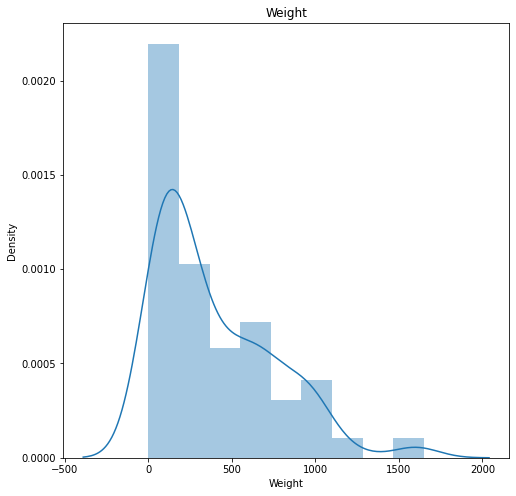

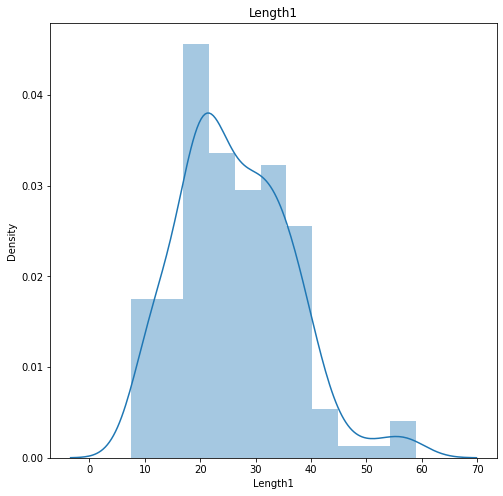

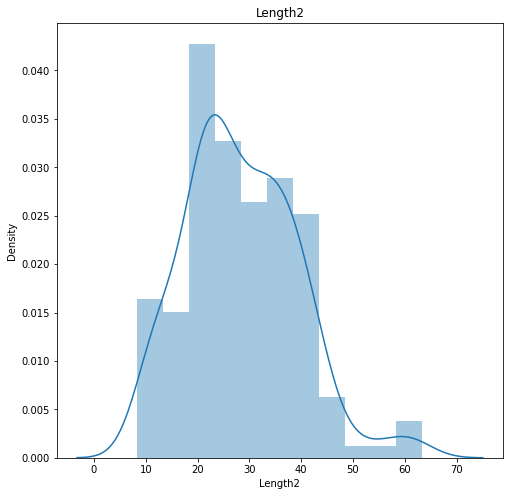

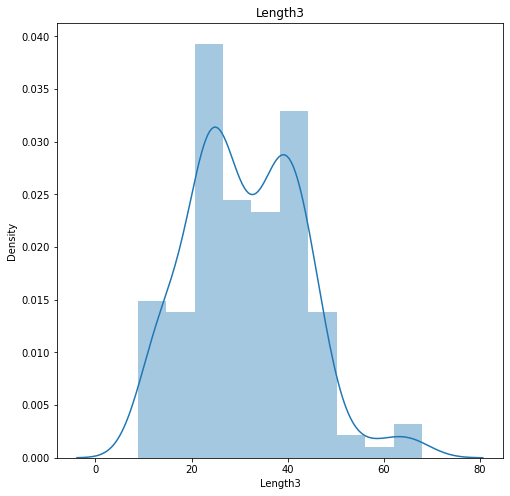

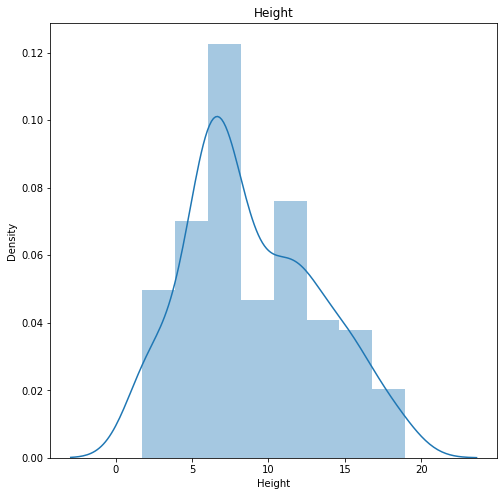

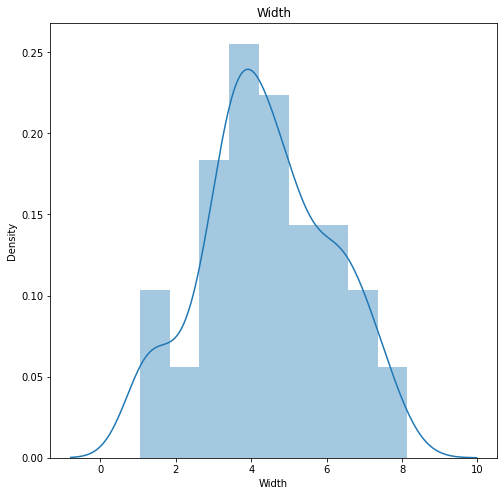

In [111]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,8))
    plt.title(i)
    plt.xlabel(i)
    sns.distplot(x=df[i])
    plt.show()

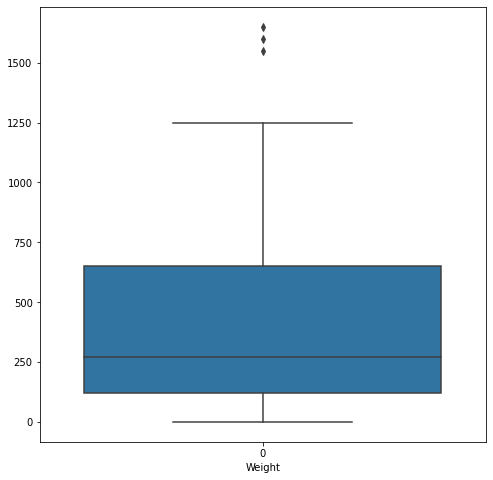

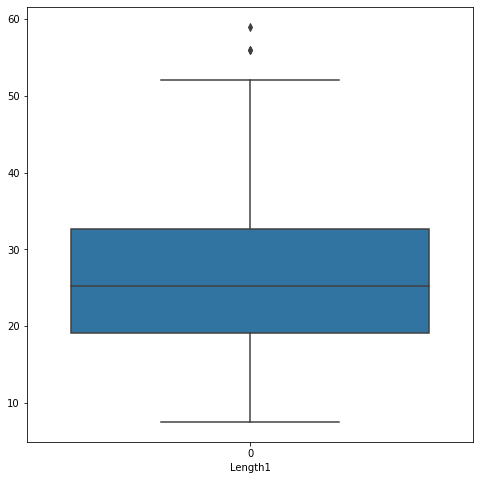

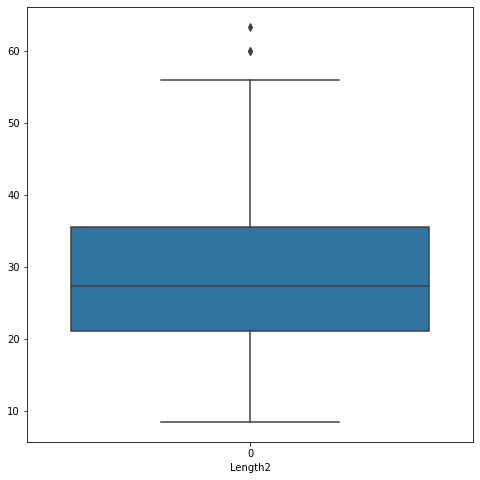

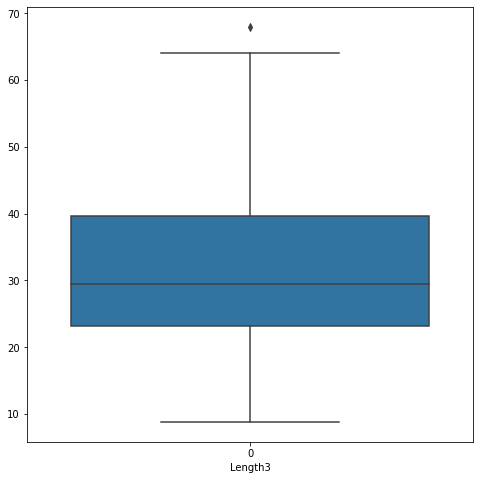

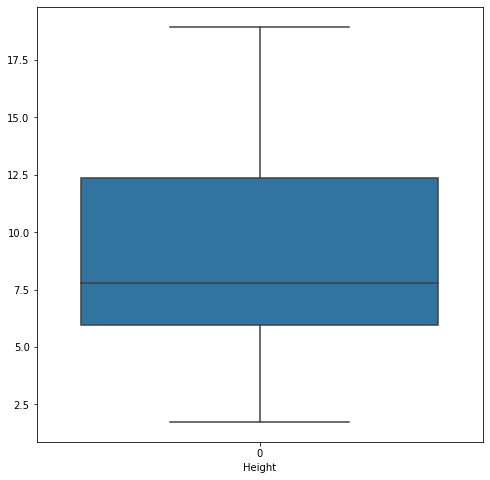

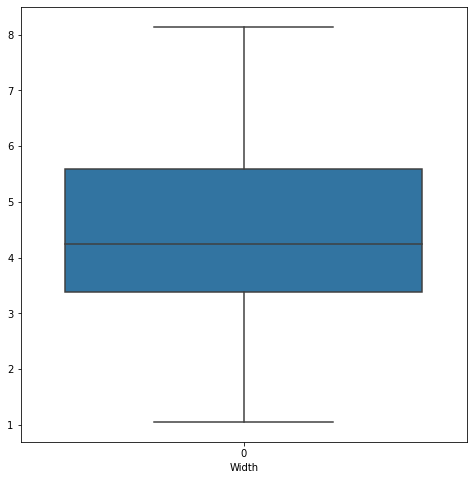

In [112]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,8))
    plt.xlabel(i)
    sns.boxplot(data=df[i])
    plt.show()

# bivariate non-graphical analysis 

In [113]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


# bivariate graphical analysis

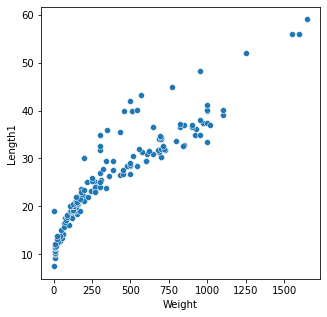

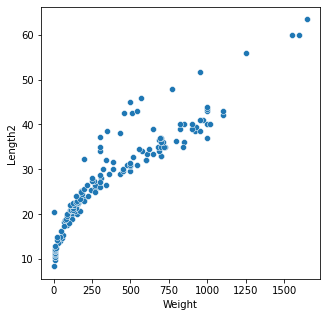

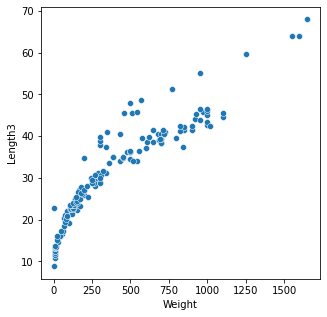

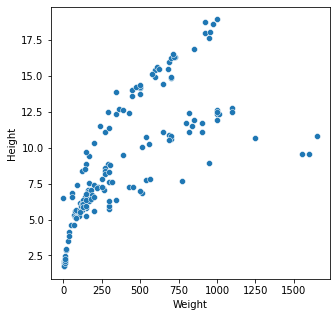

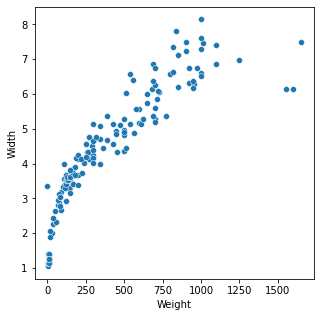

In [114]:
#target y is Weight column
for i in df.columns[2:]:
    plt.figure(figsize=(5,5))
    plt.xlabel('Weight')
    plt.ylabel(i)
    sns.scatterplot(x=df['Weight'], y=df[i])
    plt.show()

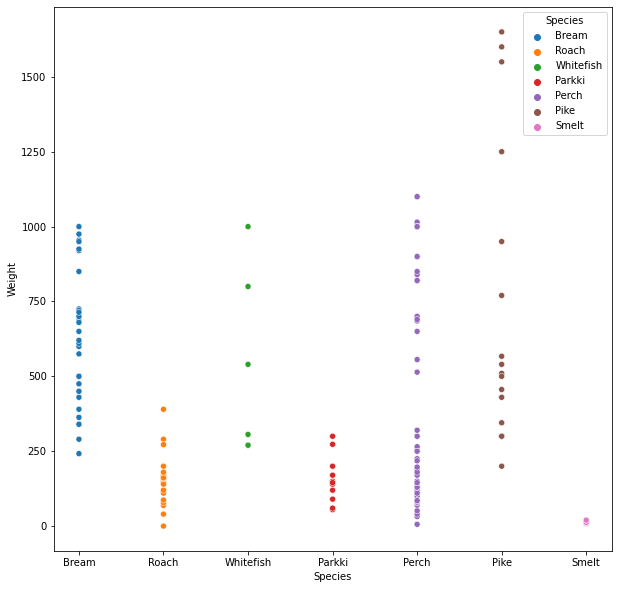

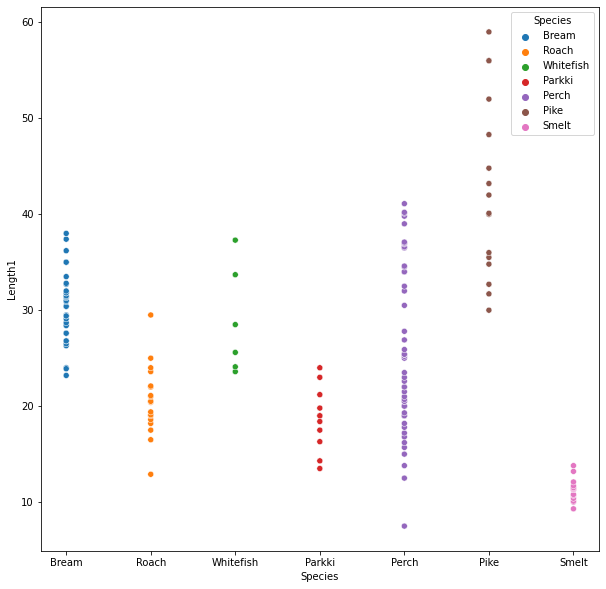

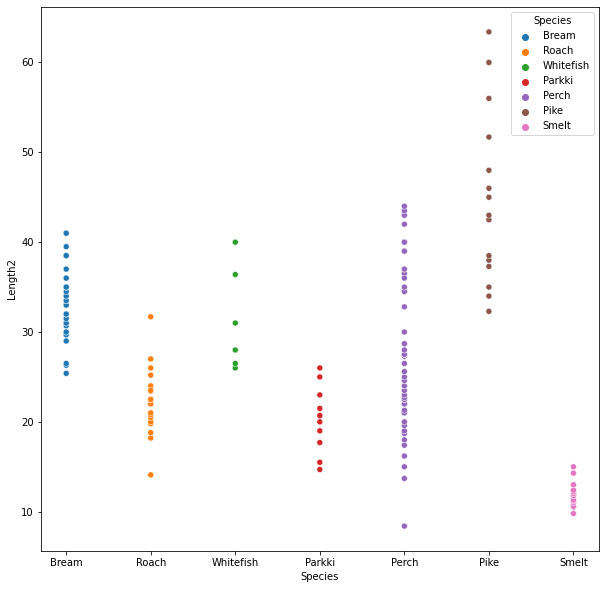

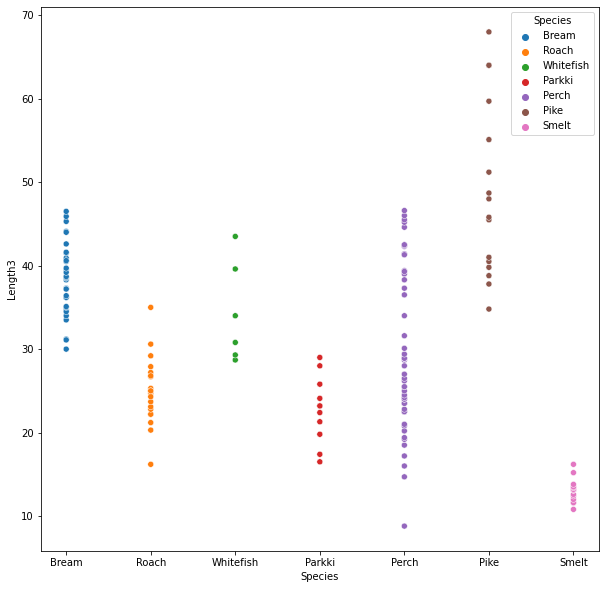

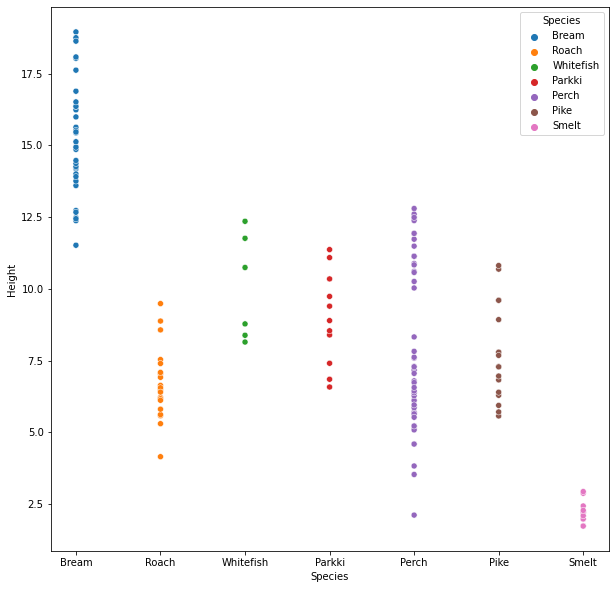

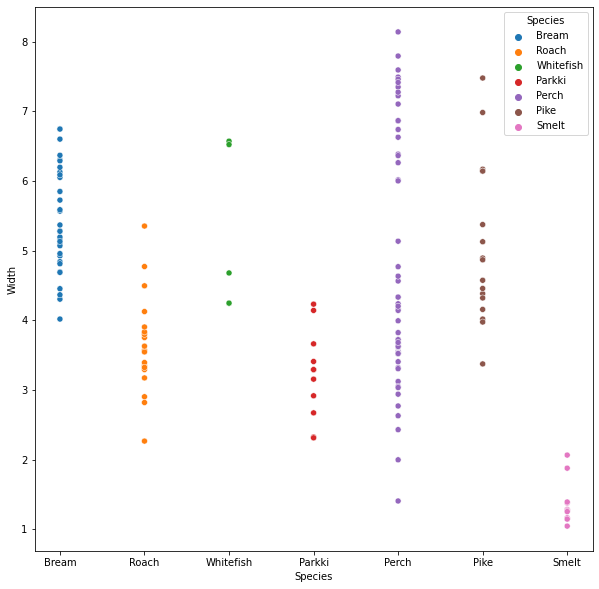

In [115]:
for i in df.columns[1:]:
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=df['Species'],y=df[i],hue=df['Species'],marker='o')
    plt.show()


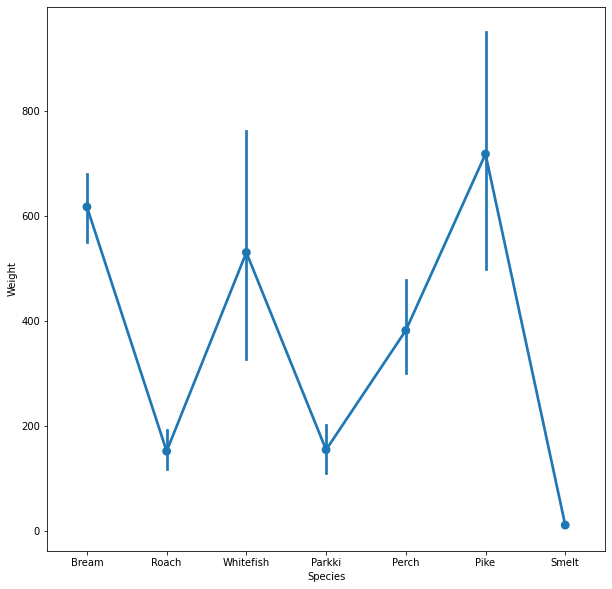

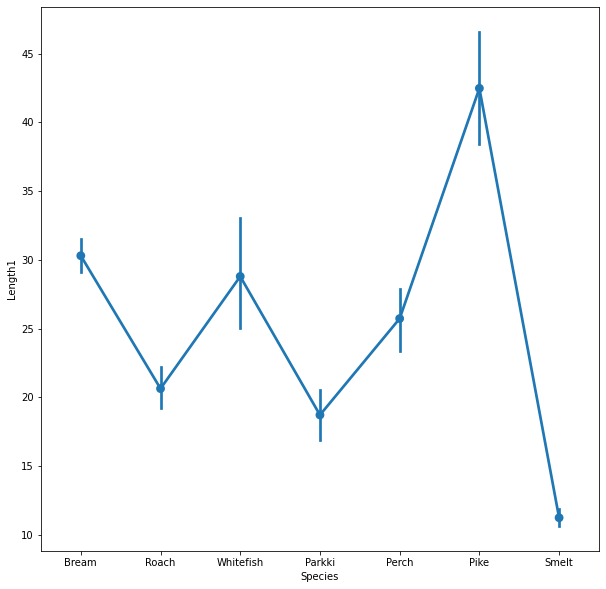

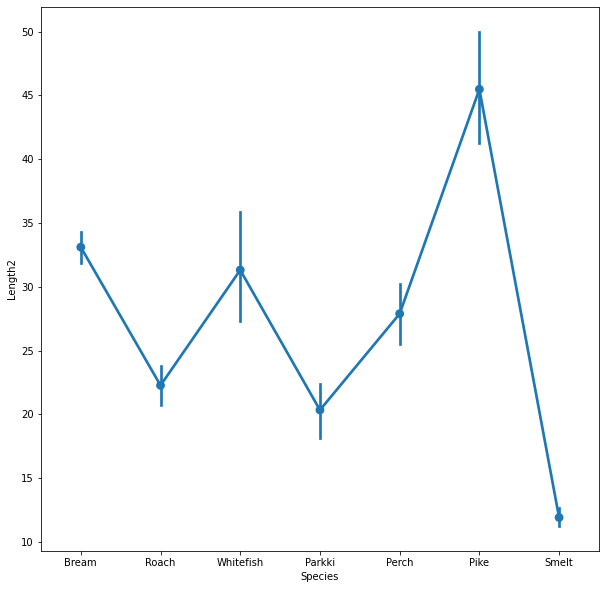

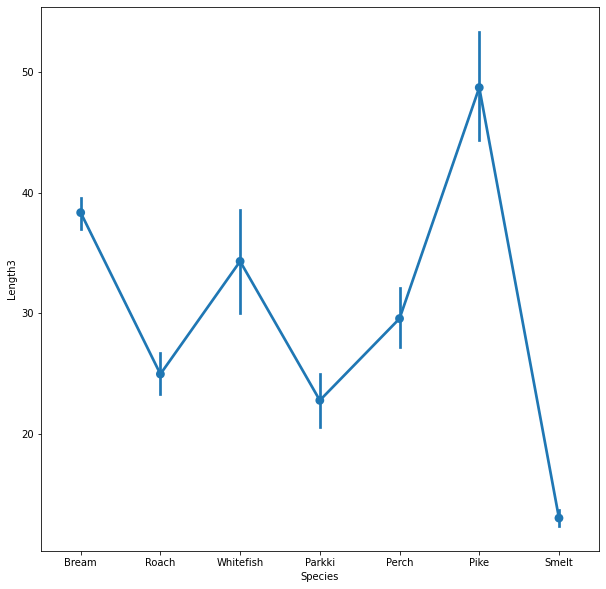

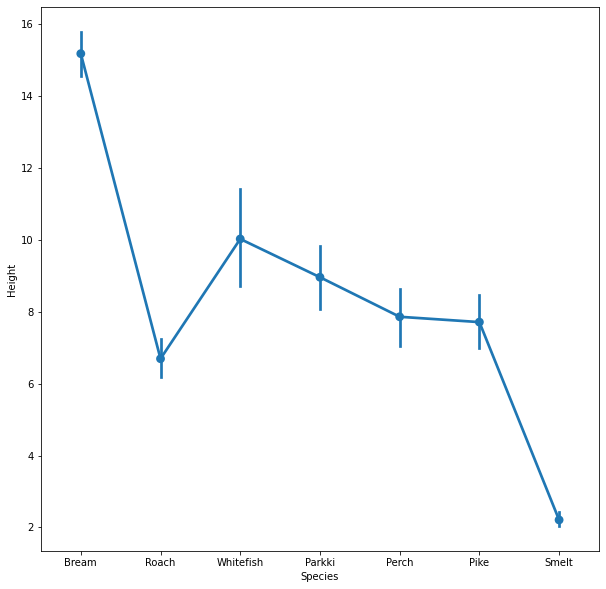

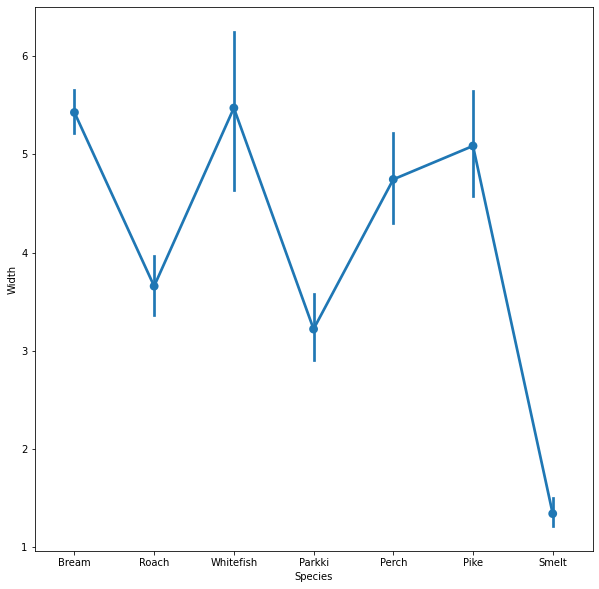

In [116]:
for i in df.columns[1:]:
    plt.figure(figsize=(10,10))
    sns.pointplot(x=df['Species'], y=df[i])
    plt.show()

# multivariate analysis

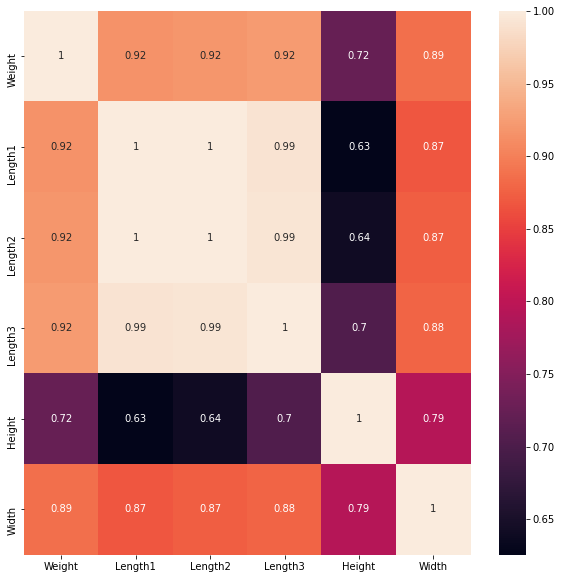

In [117]:
cor_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=cor_matrix,annot=True)
plt.show()

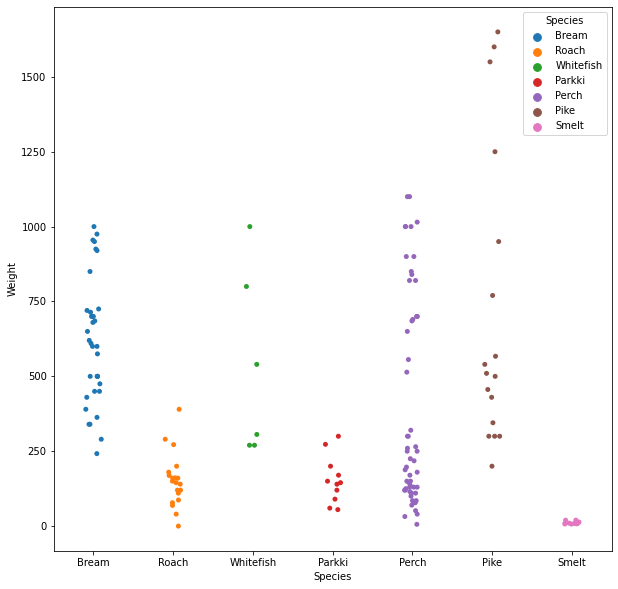

In [118]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Species'],y=df['Weight'], hue=df['Species'])
plt.show()

# outlier treatment

In [119]:
#our target is weight column
q1=np.quantile(df['Weight'],0.25)
q3=np.quantile(df['Weight'],0.75)
iqr=q3-q1
#as we can see in box plots there are no negative outiers
upper_whisk=q3+1.5*iqr
df=df[df['Weight']<upper_whisk]
lower_whisk=q1-1.5*iqr
df=df[df['Weight']>lower_whisk]
df.shape


(156, 7)

In [138]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
# print(scl)
xtrain,xtest,ytrain,ytest=tts(df[['Length3','Width']],df['Weight'], test_size=0.30, )
lr=LinearRegression()
lr.fit(xtrain,ytrain)
                                 

LinearRegression()

In [139]:
#training data score
lr.score(xtrain,ytrain)

0.8903247568851483

In [140]:
yhat=lr.predict(xtest)
yhat

array([ 104.78698177,  219.14407156,  186.55892777,  295.03803787,
        180.2849077 ,  238.72330702,  321.76581124,   61.58806488,
        145.34413086,  188.11649263,  618.4138531 ,  524.65260719,
        560.50273383, -203.08527507,  -60.88170262,  215.99635773,
        482.79398598,  975.19726052,  450.97272964,  524.62865752,
        239.33462078,  566.06830767,  668.38859736,   87.21773821,
        456.29538306,  189.8195934 ,  712.03761989,  572.97145663,
        539.08077555,  419.69649493,   74.04209227,  215.99635773,
        278.69054994,   24.5853738 ,  924.24959492,  824.6586992 ,
       -171.0428315 ,  123.49641578,  446.03316496,  467.90054387,
        343.92665693,  597.51950048,  319.4069849 ,  496.27038853,
       -204.3269152 , -211.6166718 ,  754.90559105])

In [141]:
ytest

78       78.0
93      145.0
86      120.0
51      180.0
41      110.0
43      150.0
101     218.0
63       90.0
38       87.0
39      120.0
20      575.0
132     430.0
18      610.0
146       7.5
157      19.7
91      130.0
130     300.0
126    1000.0
12      500.0
6       500.0
95      170.0
17      700.0
110     556.0
81       85.0
131     300.0
82      110.0
28      850.0
16      700.0
54      390.0
2       340.0
76       70.0
92      150.0
48      169.0
75       51.5
127    1000.0
33      975.0
151      10.0
77      100.0
129     300.0
7       390.0
71      300.0
109     514.0
100     197.0
11      500.0
147       7.0
72        5.9
30      920.0
Name: Weight, dtype: float64

In [142]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,yhat)

In [143]:
#testing data score
print(r2)

0.8609794706717234
